In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [71]:
# input data
delta,t,V,Vp = np.genfromtxt('strain_data.txt',unpack=True,missing_values='N/A')

In [72]:
print(delta)
print(t)
print(V)
print(Vp)

[0.   0.05 0.1  0.15 0.2  0.25 0.3 ]
[1.4461 1.2687 1.1157 0.9833 0.8682 0.7684 0.6816]
[ 6.61e+01       nan  1.73e+01       nan  2.60e+00 -6.00e-02 -1.40e+00]
[-2.08 -1.55 -1.17 -0.9  -0.7  -0.55 -0.43]


In [73]:
V_sim=[x for x in V if not np.isnan(x)]
delta_sim=[]
for i,x in enumerate(V):
    if not np.isnan(x):
        delta_sim.append(delta[i])
print(V_sim)
print(delta_sim)

[66.1, 17.3, 2.6, -0.06, -1.4]
[0.0, 0.1, 0.2, 0.25, 0.3]


In [74]:
tinterp = interpolate.interp1d(delta,t,kind='cubic')
Vinterp = interpolate.interp1d(delta_sim,V_sim,kind='cubic')
Vpinterp = interpolate.interp1d(delta,Vp,kind='cubic')

In [78]:
# Define energy list

def gamma(s,a):
    return (s*a - 1)/(a + 1)

def term1(t,mu,s,a):
    return (t + mu/6)

def term2(t,mu,s,a):
    return (t + mu/6)*(t - mu/6 + gamma(s,a))

def term3(t,mu,s,a):
    return 2*t + gamma(s,a)

def e13(t,mu,s,a):
    return -mu - 3/(a + 1)

def e23(t,mu,s,a):
    return -2*mu + (3*s*a - 6)/(a + 1)

def e33(t,mu,s,a):
    return -3*mu + 9*(s*a - 1)/(a + 1)

def esf(t,mu,s,a):
    return -9*(t + mu/6)**2/(2*t + gamma(s,a))

def lst(t,mu,s,a):
    if (term2(t,mu,s,a) > 0 
        and 1 >= term1(t,mu,s,a)/term3(t,mu,s,a) 
        and term1(t,mu,s,a)/term3(t,mu,s,a) > 0):
        return [e13(t,mu,s,a), e23(t,mu,s,a), e33(t,mu,s,a), esf(t,mu,s,a), 0.0]
    else:
        return [e13(t,mu,s,a), e23(t,mu,s,a), e33(t,mu,s,a), 999999.0, 0.0]

def pref_state(t,mu,s,a):
    return lst(t,mu,s,a).index(min(lst(t,mu,s,a)))

1000
1000
1000
2000


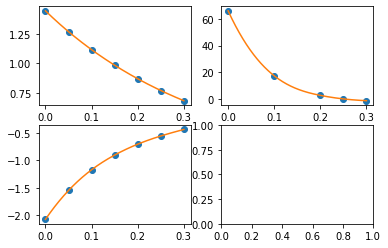

In [92]:
nx = 1000
ny = 2000
delta_new = np.linspace(0, 0.3, nx)
tnew = tinterp(delta_new)   # use interpolation function returned by `interp1d`
Vnew = Vinterp(delta_new)
Vpnew = Vpinterp(delta_new)
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(delta, t, 'o', delta_new, tnew, '-')
axs[0,1].plot(delta_sim, V_sim, 'o', delta_new, Vnew, '-')
axs[1,0].plot(delta, Vp, 'o', delta_new, Vpnew, '-')
a_lst = [-x/y if x>=0 else x/y for x, y in zip(Vnew,Vpnew)]
s_lst = [1 if x>=0 else -1 for x in Vnew]
norm = [x-y if x>=0 else -x-y for x, y in zip(Vnew,Vpnew)]
mu_lst = np.linspace(-10,10,ny)
tbar = [x/y for x, y in zip(tnew,norm)]

print(len(a_lst))
print(len(s_lst))
print(len(tbar))
print(len(mu_lst))

In [93]:
mubar = np.zeros((ny,nx))
data = np.zeros((ny,nx))
print(np.shape(mubar))
print(np.shape(data))
for i in range(nx):
    for j in range(ny):
        mubar[j,i] = mu_lst[j]/norm[i]

for i in range(nx):
    for j in range(ny):
        data[j,i] = pref_state(tbar[i],mubar[j,i],s_lst[i],a_lst[i])

(2000, 1000)
(2000, 1000)


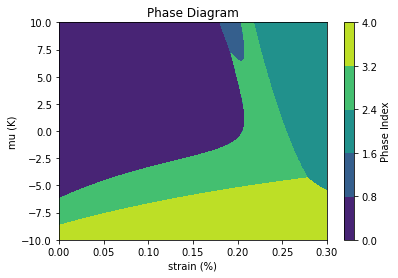

In [101]:
# cmap = plt.cm.get_cmap('Accent')
cmap = plt.cm.get_cmap('viridis')

colors = [cmap(i*0.3) for i in range(4)]

fig, ax = plt.subplots()

# X, Y = np.meshgrid(delta_new, mu_lst)
p1 = ax.contourf(delta_new, mu_lst, data, 4, vmin = 0, vmax = 4)

ax.set_title('Phase Diagram')
ax.set_xlabel('strain (%)')
ax.set_ylabel('mu (K)')

cbar = fig.colorbar(p1)
cbar.ax.set_ylabel('Phase Index')
# Add the contour line levels to the colorbar
# cbar.add_lines(p1)

# plt.colorbar(p1)
# cbar.ax.set_ylabel('verbosity coefficient')
# # Add the contour line levels to the colorbar
# cbar.add_lines(CS2)
# plt.xlabel("strain (%)")
# plt.ylabel("mu")
plt.show()
fig.savefig('phase_diagram_strain.png')